#### 1. 폴더정리, 2. Dataset Augmentation 등을 수행하기 위한 notebook

#### Libraries

In [1]:
from os import listdir, makedirs
from os.path import isfile, isdir, join
import cv2, copy, json, os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import PIL
import zipfile
import pathlib

In [2]:
# CV_DeepLearning 폴더에 Acu_Dataset 폴더 생성 
if not (os.path.isdir('../CV_DeepLearning/Acu_Dataset')):
    os.mkdir('../CV_DeepLearning/Acu_Dataset')

#### Clean Zipfile

In [3]:
# Acu_Dataset 폴더에 저장된 압축 파일들 푸는 과정 

dset_path = '../CV_DeepLearning/Acu_Dataset'
dset_list = os.listdir(dset_path)
zip_list = list(np.array(dset_list)[np.array(['.zip' in d for d in dset_list])])

for d in zip_list:
    d_zip_loc = dset_path + '/' + d
    with open(d_zip_loc, 'rb') as fileobj:
        z = zipfile.ZipFile(fileobj)
        z.extractall(dset_path)
        z.close()
    file_to_rem = pathlib.Path(d_zip_loc)
    file_to_rem.unlink()


#### Cleaning Folders

In [4]:
from img_aug_refined import *
d_list = os.listdir(dset_path)
d_list.remove('README.md')
clean_and_rename_directory(d_list)

C:\Users\NormalKim\[0_ACU_FINAL_0830]\CV_DeepLearning
completed cleaning folders:  ./Acu_Dataset/hapgok
oldfile:  ./Acu_Dataset/hapgok\hapgok_info_╝÷┴ñ.json  new_file :  ./Acu_Dataset/hapgok\hapgok_info.json


#### Checking Background Images

testing images


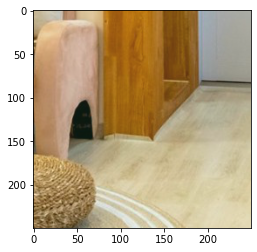

In [5]:
# cropping 할 배경 이미지 (aug) 리스트 
dir1 = './background-images/'
imdirs = os.listdir(dir1)
imlist = [ plt.imread(dir1 + i) for i in imdirs ]

###Quick Check ###
random_indx = np.random.randint(low = 0,high = 8, size = len(imlist))
print('testing images')
plt.imshow(rand_crop_img(imlist[random_indx[0]]))

In [6]:
os.chdir('../CV_DeepLearning')
os.getcwd()

'C:\\Users\\NormalKim\\[0_ACU_FINAL_0830]\\CV_DeepLearning'

In [7]:
kw = 'hapgok'
folder_path = f'../CV_DeepLearning/Acu_Dataset/{kw}'
folder_ = os.listdir(folder_path)
bool_ind = ['.json' in k for k in folder_]

# open json data
json_file_name = np.array(folder_)[bool_ind][0]
json_file_path = os.path.join(folder_path, json_file_name )
json_data = open_json_file(json_file_path)

#### Keyword to Augment

In [8]:
aug_cls = 'hapgok'

In [ ]:
# 기존 데이터셋 -> 학습 데이터 5배 증가  
# filled data: 보통 5000장 ~ 40분

# org -> sctr
augment_hands(aug_cls, save_name = 'sctr', img_folder = 'org') 

# org -> rotated
augment_hands(aug_cls, save_name = 'rotated', img_folder = 'org')

# org -> filled
augment_hands(aug_cls, save_name = 'filled', img_folder = 'org', imlist = imlist) #

# rotated -> rotated + filled
augment_hands(aug_cls, save_name = 'rotated_filled', img_folder = 'rotated', 
               json_name = f'{aug_cls}_rotated', imlist = imlist, chg_flag = True)

# sctr -> sctr + filled 
augment_hands(aug_cls, save_name = 'sctr_filled', img_folder = 'sctr', 
               json_name = f'{aug_cls}_sctr',imlist = imlist, chg_flag = True)

#### After Augmentation, checkout if tagging is properly done

In [ ]:
kw = aug_cls
#augmented = ''
augmented = '/rotated_filled'
folder_path = f'../CV_DeepLearning/Acu_Dataset/{kw}' + augmented 

# open json data
folder_ = os.listdir(folder_path)
bool_ind = ['.json' in k for k in folder_]
json_file_name = np.array(folder_)[bool_ind][0]
json_file_path = os.path.join(folder_path, json_file_name )
json_data = open_json_file(json_file_path)
json_list = list(json_data) 

# indexing json data 
json_index = 100

json_key = json_list[json_index] 
print('json_key: ', json_key ) 
x,y = json_data[json_key][1]['acup_coord']

# get im directory 
if augmented == '':
    json_key = json_key.replace('sobu', 'Hand')
    im_path = os.path.join(folder_path + augmented, 'org', json_key+ '.png')
else:
    im_path = os.path.join(folder_path + augmented, json_key+ '.png')
img = Image.open(im_path)

# try_out
plt.imshow(create_circle_patch(img, x, y, color = 'blue', r = 5))